# Importing Libraries

In [2902]:
# For dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Prepocessing data
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Prepare Data for classification
from sklearn.model_selection import train_test_split

#Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve


In [2903]:
#Install imbalanced-learn
!pip install -U imbalanced-learn

# Churn Dataset

This dataset contains information about:

Customers who left within the last month – the column is called Churn.

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender,  seniorCitizen, and if they have  dependents and partner

In [2904]:
# load dataset
churn_df = pd.read_csv('churn.csv', sep = ',')
churn_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2905]:
churn_df.shape 

(7043, 21)

There are 7043 customers and 20 features. The target variable we want to be able to predict is **Churn** which is equal to 'Yes' if the customer churned, and 'No' otherwise

In [2906]:
#shows information about different features, number of non-null values and attribute type.
churn_df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [2907]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are :

3 numeric variables – tenure, MonthlyCharges and TotalCharges
18 categorical variables (SeniorCitizen is equal to 1 if the customer is considered 'Senior' and 0 otherwise)

Data set contains numeric attributes (int64, float64) as well as categorical attributes (object).

In [2908]:
numerical_attributes = churn_df.select_dtypes(include=['int64','float64'])
numerical_attributes.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [2909]:
categorical_attributes = churn_df.select_dtypes(include=['object'])
categorical_attributes.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [2910]:
churn_df['TotalCharges'] = pd.concat([churn_df['TotalCharges'].str.split()
                       .str[0]
                       .str.replace(',','').astype(float)], axis=1)

In [2911]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


count: number of examples counted for the selected function
    
mean: arithmetic mean for the selected function
    
std: standard deviation for the selected function
    
min: minimum value presented by the examples for the selected function
    
25%: first quartile calculated on the examples for the selected function
    
50%: second quartile calculated on the examples for the selected function
    
75%: third quartile calculated on examples for selected feature
    
max: maximum value presented by the examples for the selected function

From above output we can observe :

Mean Monthly charges is about 64.76 units and 75% of observations are monthly charged around 89.85

The maximum tenure is 72 months with mean being about 32 months.

About 50% of customers stayed for 55 months tenure and were charged 70.3 per month
    
There are 11 missing values in TotalCharges. 
To get more relevant information, we will visualize attributes of the data and distribution of target variable(Churn)


In [2912]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Visualization

## Univariate analysis

Let's start our exploration by looking at the main variable of interest **churn** percentage and investigate other factors.

No     5174
Yes    1869
Name: Churn, dtype: int64


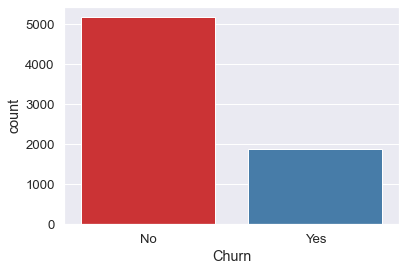

In [2913]:
sb.countplot(x="Churn", data=churn_df, palette='Set1')
print(churn_df['Churn'].value_counts())

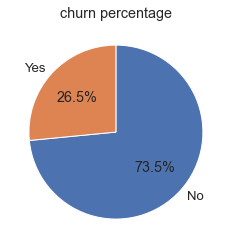

In [2914]:
#look at churn percentage.
churn_percentage= churn_df['Churn'].value_counts()
plt.pie(churn_percentage, autopct='%.1f%%', labels = churn_percentage.index, startangle = 90, counterclock = False);
plt.title('churn percentage');

The ratio of churn customers is approxmetly 27 % of total customers.

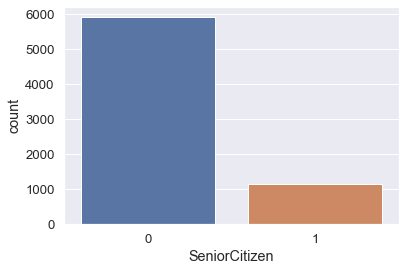

In [2915]:
#look at SeniorCitizen factor
sb.countplot(x='SeniorCitizen', data=churn_df)
plt.show()

There are 6 times less seniors

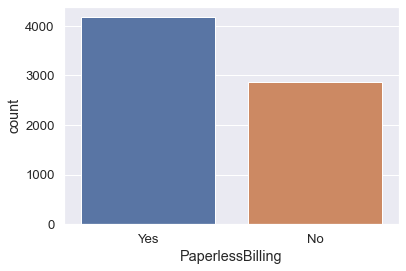

In [2916]:
# look at PaperlessBilling factor.
sb.countplot(x='PaperlessBilling', data=churn_df)
plt.show()

A lot of customers have a paperless billing

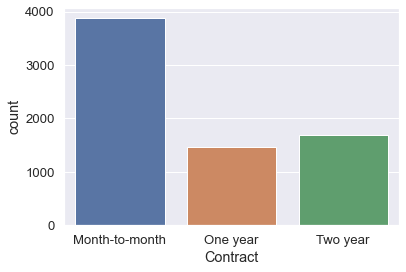

In [2917]:
# look at contract factor.
sb.countplot(data= churn_df,x= 'Contract' );

month to month contract have the highest number of customers compared to one and two year contract.

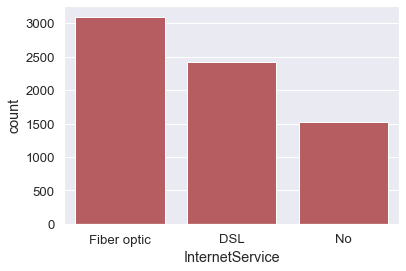

In [2918]:
#look at Internet Service factor.
base_color = sb.color_palette()[3]
order = churn_df['InternetService'].value_counts().index
sb.countplot(data= churn_df, x= 'InternetService',color = base_color, order = order );

fiber optic is slightly higher than DSL

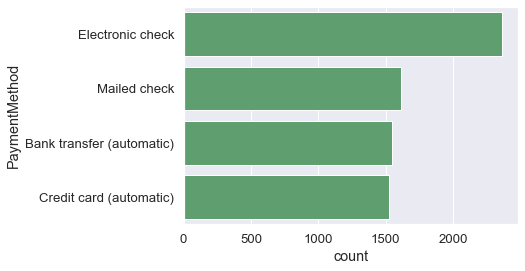

In [2919]:
#look at Payment Method factor.
base_color = sb.color_palette()[2]
order = churn_df['PaymentMethod'].value_counts().index
sb.countplot(data= churn_df,y= 'PaymentMethod',color = base_color, order = order );

Electronic check have the highest number of customers compared to others.

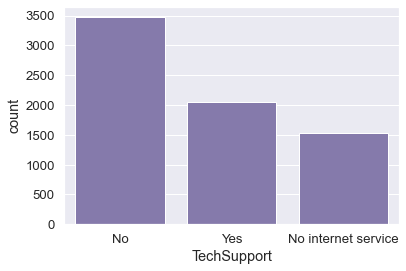

In [2920]:
#look at TechSupport factor.
base_color = sb.color_palette()[4]
order = churn_df['TechSupport'].value_counts().index
sb.countplot(data= churn_df, x= 'TechSupport',color = base_color, order = order );

high number of customers not have techsupport.

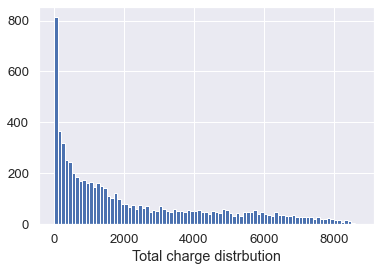

In [2921]:
#look at Total charge distrbution.
bins= np.arange(0,churn_df['TotalCharges'].max()+100,100)
plt.hist(churn_df['TotalCharges'], bins= bins);
plt.xlabel('Total charge distrbution');

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


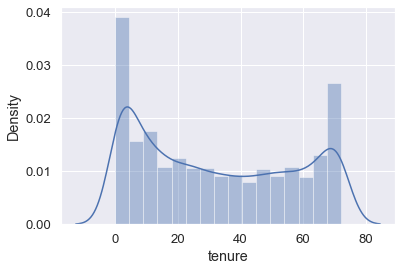

In [2922]:
sb.distplot(churn_df.tenure) #distribution with kernel density estimation, 20 bins by default
plt.show()

This feature don't follow a normal distribution. The plot shows that there are many people who stay for a short time, and many people who stay for more than 60 months (5 years), this kind of distribution was expected

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


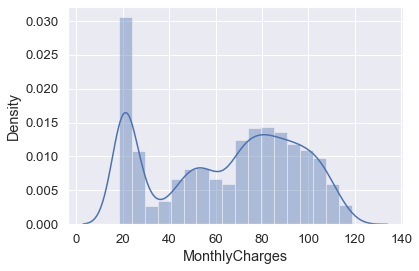

In [2923]:
sb.distplot(churn_df.MonthlyCharges)
plt.show()

A lot of people have minimum monthly charges because they choose the cheapest offer

we looked at the univariate distribution of  features in the churn dataset. Now, we'll investigate relationships between these variables and churn coulmn of interest.


## Bivariate analysis

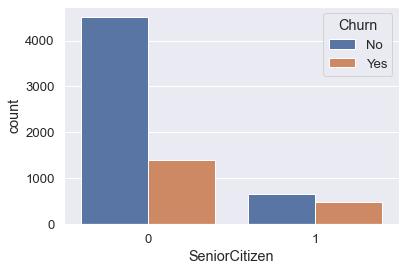

In [2924]:
#look at SeniorCitizen factor compared with Churn factor.
sb.countplot(x='SeniorCitizen', data=churn_df, hue='Churn')
plt.show()

Non senior Citizens are high churners

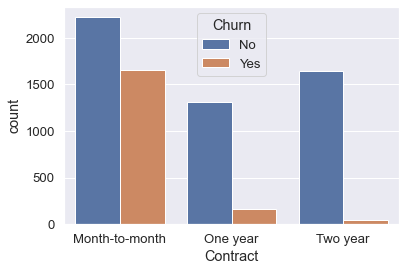

In [2925]:
#look at Contract factor compared with Churn factor.
sb.countplot(data = churn_df, x= 'Contract', hue = 'Churn');

we observed here that Month to month contract have the highest churn ratio , it observed that Month to month contract affect on churn percentage and there is a relationship.

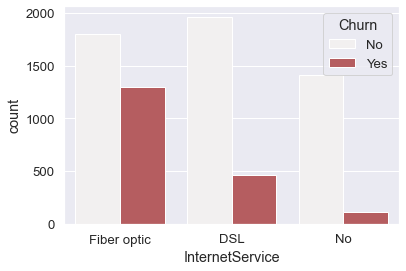

In [2926]:
#look at Internet Service factor compared with Churn factor.
base_color= sb.color_palette()[3]
order = churn_df['InternetService'].value_counts().index
sb.countplot(data = churn_df, x= 'InternetService', hue = 'Churn',  order = order, color= base_color );

we observed here that fiber optic internet service have the highest churn ratio although it have high number of customers because it is faster, DSL have low churn ratio.

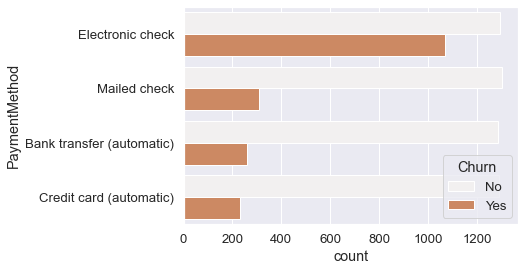

In [2927]:
#look at Payment Method factor compared with Churn factor.
base_color = sb.color_palette()[1]
sb.countplot(data = churn_df, y= 'PaymentMethod', hue = 'Churn', color= base_color);

Electronic check Payment Method observed that have the highest churn ratio although all other factors have the same number of non churn customers.

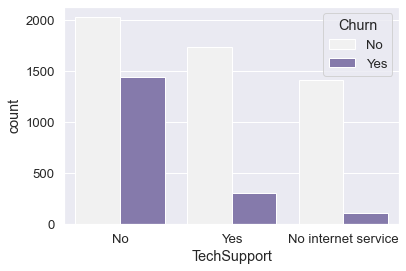

In [2928]:
#look at TechSupport factor compared with Churn factor.
base_color = sb.color_palette()[4]
order = churn_df['TechSupport'].value_counts().index
sb.countplot(data= churn_df, x= 'TechSupport', hue = 'Churn' ,color = base_color, order = order );

It is observed that important to customers have TechSupport to prevent increasing churn ratio.

Now we analyse numeric features regarding the Churn

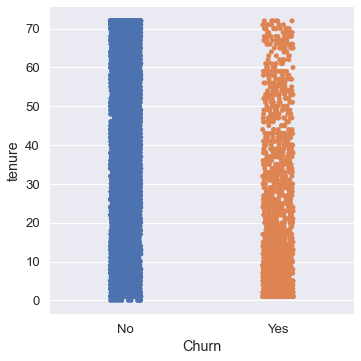

In [2929]:
sb.catplot(x='Churn', y='tenure', data=churn_df)
plt.show()

Among those who have churned, there is a large part that has remained for a short time, which is logical, while for those who stayed, the distribution is fairly homogeneous

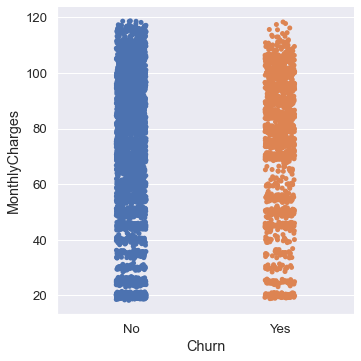

In [2930]:
sb.catplot(x='Churn', y='MonthlyCharges', data=churn_df)
plt.show()

Among those who have churned, many had high charges > 65

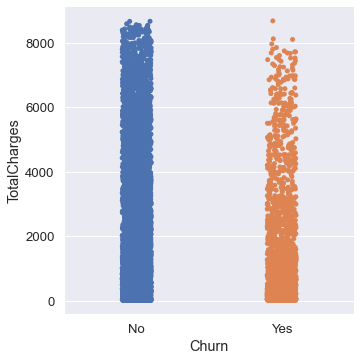

In [2931]:
sb.catplot(x='Churn', y='TotalCharges', data=churn_df)
plt.show()

The overall charge for those who have churned is low in general, because they tend to stay for a short time

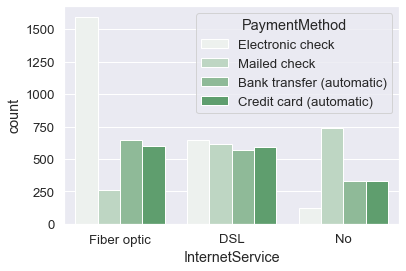

In [2932]:
#look at InternetService and PaymentMethod factors.
base_color = sb.color_palette()[2]
order = churn_df['InternetService'].value_counts().index
sb.countplot(data= churn_df, x= 'InternetService',  hue = 'PaymentMethod' ,color = base_color, order = order );

High number of customers that have fibre optic internet services have Electronic check Payment Method.

# Data Preprocessing
Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured


this is typically known as **preprocessing**. Unfortunately, for this dataset, there are many invalid or missing entries(" ") we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

## Data Cleaning

This section is aimed at handling the missing, duplicate values and outliers to produce a clean dataset on which further preprocessing and analysis can be carried out.

### Handling Missing Values
Unfortunately, this data set does have a lot of  missing entries that are represented
'NaN'. Thus, I must preprocess the data so it is ready to be used as input
for machine learning algorithms. 

In [2933]:
#Number of NA values
churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

we have got missing values in attribute **TotalCharges** having 11.

### Data imputation
We start by replacing missing values by NaN then we drop missing values of the attribute **TotalCharges**.

In [2934]:
nan_value = np.nan
churn_df.replace(" ", nan_value, inplace=True)

In [2935]:
#deleting missing values
churn_df=churn_df.dropna()

In [2936]:
# Check for any existing missing values
print("Missing values now: \n", churn_df.isnull().sum())

Missing values now: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Here, there are no more missing values!

### Handling noisy Data

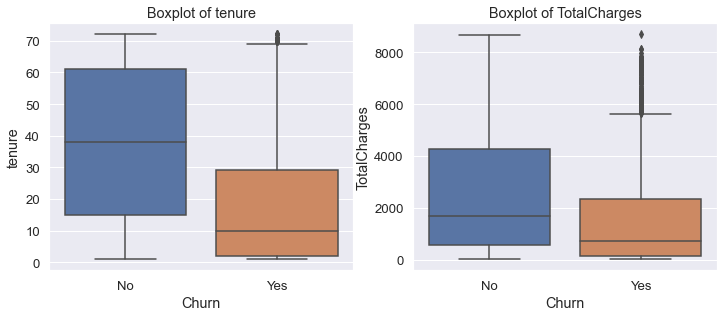

In [2937]:
fill_list = ['tenure','TotalCharges']
#Visual examination of outliers:
plt.figure(figsize=(25,10))

for i, column in enumerate(fill_list):
    plt.subplot(len(fill_list), 4, i+1)
    sb.boxplot(x='Churn',y=churn_df[column],data=churn_df)
    plt.title("Boxplot of {}".format(column))
    
plt.show()

In [2938]:
for column in fill_list:
    q75, q25 = np.percentile(churn_df[column], [75 ,25])
    iqr = q75 - q25
    #This method considers all values that are outside the threshold of 1.5 times the IQR as outliers
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers in {}: {}".format(
        column, 
        len((np.where((churn_df[column] > max_val) | (churn_df[column] < min_val))[0]))))

Number of outliers in tenure: 0
Number of outliers in TotalCharges: 0


In [2939]:
# Checking for outliers in the continuous variables
num_telecom = churn_df[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [2940]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## Data integration

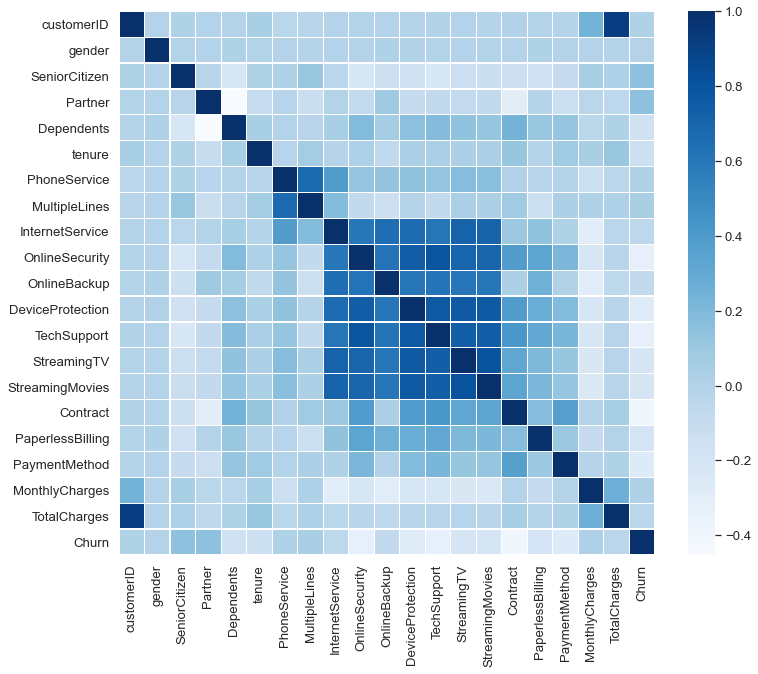

In [2941]:
#We plot the correlation matrix, the darker a box is, the more features are correlated
plt.figure(figsize=(12, 10))

corr = churn_df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap='Blues')

**Internet service ,Online security, Online Backup, DeviceProtection, TechSupport, StreamingTV and streamingMovies** highly correlated features.

**TotalCharges** and **customerID** are also very correlated, maybe the ID is chosen according to high-potential customers.

The most correlated to churn :**SeniorCitizen, Partner, MultipleLines, OnlineBackup, MonthlyCharges**

we need to convert the categorical attributes to numerical attributes

In [2942]:
#label encoding for gender feature
churn_df['gender'] = churn_df['gender'].map({'Male':1,'Female':0})


#label encoding for other binary features
binary_variables = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
churn_df[binary_variables] = churn_df[binary_variables].replace({'Yes':1, 'No':0})


#One heat coding for categorical features with more than 2 options
churn_df.drop(['customerID'], axis = 1, inplace = True)
churn_df.drop(['OnlineSecurity'], axis = 1, inplace = True)
churn_df.drop(['OnlineBackup'], axis = 1, inplace = True)
churn_df.drop(['TechSupport'], axis = 1, inplace = True)
churn_df.drop(['DeviceProtection'], axis = 1, inplace = True)
churn_df.drop(['StreamingTV'], axis = 1, inplace = True)
churn_df.drop(['StreamingMovies'], axis = 1, inplace = True)

other_variables = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
onehot_encoded = pd.get_dummies(churn_df[other_variables])

## Data reduction

In [2943]:
#we drop these variables, then concatenate the table with the one-hot encoded version
churn_df= churn_df.drop(columns=other_variables) 
churn_df= pd.concat([churn_df, onehot_encoded], axis=1)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


## Data transformation

In [2944]:
from sklearn.preprocessing import MinMaxScaler

In [2945]:
scaler = MinMaxScaler()

churn_df[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(churn_df[['tenure','MonthlyCharges','TotalCharges']])

churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,0,1,0,1,0,0,0,0,1,0


In [2946]:
# Putting response variable to y
y = churn_df['Churn']

y.head()

# Putting feature variable to X
X = churn_df.drop(['Churn'], axis=1)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,0,1,0,1,0,0,0,0,1,0


##  Data discretization

The data set does not contain continuous data, so the data
discretization will not be applied.

# Classification

Our task is a binary classification problem with imbalanced classes. So, instead of using accuracy, we'll use AUC score and recall, because it's easy to achieve a good accuracy by predicting only 'No', while AUC will be more relevant by taking into account the False Positive Rate and the True Positive Rate

## Imbalanced data

0    5163
1    1869
Name: Churn, dtype: int64


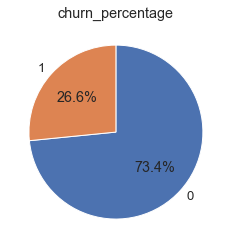

In [2947]:
#look at churn percentage.
churn_percentage= churn_df['Churn'].value_counts()
plt.pie(churn_percentage, autopct='%.1f%%', labels = churn_percentage.index, startangle = 90, counterclock = False);
plt.title('churn_percentage');
print(churn_df['Churn'].value_counts())

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations. One class label has a very high number of observations and the other has a very low number of observations. Such as our dataset with 73.4% over 26.6% of churn 

Given the imbalanced data set that We have from above.
We will approach this problem by two different methods. The first approach will be to implement Oversampling of the imbalanced class, and train Random classifier on the data with the recall metric in focus, the second approach will be Hybridization using SMOTE + Tomek Links.

We will choose the best model that performs well on recall.

We have randomly divided our data set using train_test_split() classifier method imported for sklearn model.

In [2948]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [2949]:
import itertools
#FUNCTION TO plot confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [2950]:
# list of model, resample, precision, recall, f1score, Auc that we will use for comparison between the two techniques 
algorithm = []
technique = []
precision = []
recall = []
F1score = []
AUCROC = []

In [2951]:
#evaluation of the model: confusion matrix, classification report,AUCROC
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Evaluation')
    print('='*60)
    cm= confusion_matrix(y_test,y_pred)
    plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    algorithm.append(algo)
    technique.append(sampling)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))

## Classification Random Forest Classifier

Random Forests is one way of avoiding overfitting that Decision Trees are prone to, in this technique we build multiple decision trees and let them vote on how to classify inputs. Random forests (or random decision forests) are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes classification. Random decision forests correct for decision trees’ habit of overfitting to their training set.

In [2952]:
#rfc
rfc = RandomForestClassifier(random_state=0) 
rfc.fit(X_train, y_train)
pred_RFC = rfc.predict(X_test) 
cls_RFC=classification_report(y_test,pred_RFC,output_dict=True)

Evaluation
Confusion matrix, without normalization
[[923 115]
 [195 174]]
[[923 115]
 [195 174]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.60      0.47      0.53       369

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407
 

AUC-ROC
0.8144427735221476


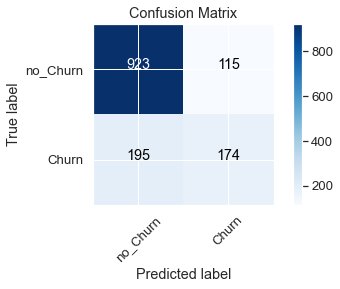

In [2953]:
#Evaluation of rfc
test_eval(rfc, X_test, y_test, 'Random forest', 'actual')

The confusion matrix of random forest classifier shows that we have 923 **TN** with 115 **FN**, and 195 **FP** with 174 **TP**

From the above, it can be seen on the actual imbalanced dataset, Random classifier model was not able to generalize well on the minority class compared to the majority class. As a result, most of the negative class samples were correctly classified. Due to this, there was less FP and more FN. 

Let's perform oversampling:

## Method 1 : Resampling -Oversampling-

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this  Undersampling and Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

Oversampling can be defined as adding more copies of the minority class. We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

In [2954]:
# train test split
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = churn_df[(churn_df['Churn']==0)] 
df_minority = churn_df[(churn_df['Churn']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 5163,
                                 random_state=0)  
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
X = df_upsampled.drop('Churn',axis='columns')
y = df_upsampled['Churn']
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X,y,test_size=0.2,random_state=0)

In [2955]:
# Apply rfc after oversampling
rfc = RandomForestClassifier(random_state=0) 
rfc.fit(X_train_os, y_train_os)
pred_os = rfc.predict(X_test_os) 
cls_RFC=classification_report(y_test_os,pred_os,output_dict=True)

Evaluation
Confusion matrix, without normalization
[[875 173]
 [ 58 960]]
[[875 173]
 [ 58 960]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1048
           1       0.85      0.94      0.89      1018

    accuracy                           0.89      2066
   macro avg       0.89      0.89      0.89      2066
weighted avg       0.89      0.89      0.89      2066
 

AUC-ROC
0.9612495125901708


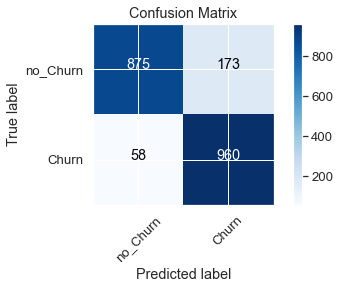

In [2956]:
#Evaluation of rfc after Resampling -Oversampling-
test_eval(rfc, X_test_os, y_test_os, 'Random forest', 'oversampling')

After oversampling, a clear surge in Recall is seen on the test data. 

Now, We are going to perform SMOTE + Tomek Links

## Method 2 : Hybridization -SMOTE + Tomek Links-
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

In [2957]:
from imblearn.combine import SMOTETomek
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 4125, 1: 1500})
After Counter({0: 3786, 1: 3786})


In [2958]:
# Apply rfc after SMOTETomek
rfc.fit(X_train_smtom, y_train_smtom)

RandomForestClassifier(random_state=0)

Evaluation
Confusion matrix, without normalization
[[829 209]
 [137 232]]
[[829 209]
 [137 232]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1038
           1       0.53      0.63      0.57       369

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407
 

AUC-ROC
0.8110291314859198


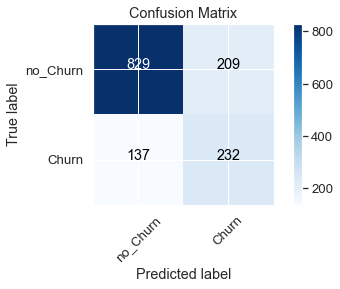

In [2959]:
#Evaluation of  rfc after SMOTETomek
test_eval(rfc, X_test, y_test, 'Random forest', 'smote+tomek')

After Hybridization using SMOTE + Tomek Links, the recall of yes churn  has slighly increased.

## Comparison

A comparative analysis was done on the dataset using one algorithm: Random Forest. we’ll ignore the accuracy metric to evaluate the performance of the classifier on this imbalanced dataset. Here, we are more interested to know that which are the customers who’ll churn out in the coming months. Thereby, we’ll focus on metrics like precision, recall, F1-score to understand the performance of the classifiers for correctly determining which customers will churn.

In [2960]:
clf_eval_df = pd.DataFrame({'algorithm':algorithm,
                            'technique':technique,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [2961]:
clf_eval_df

,algorithm,technique,precision,recall,f1-score,AUC-ROC
0,Random forest,actual,0.602076,0.471545,0.528875,0.814443
1,Random forest,oversampling,0.847308,0.943026,0.892608,0.961250
2,Random forest,smote+tomek,0.526077,0.628726,0.572840,0.811029


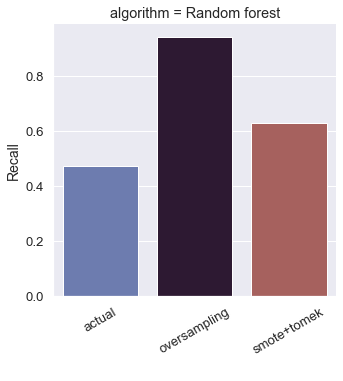

In [2962]:
sb.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sb.FacetGrid(clf_eval_df, col="algorithm", height=5)
g.map(sb.barplot, "technique", "recall", palette='twilight', order=["actual", "oversampling", "smote+tomek"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)

<Figure size 432x288 with 0 Axes>

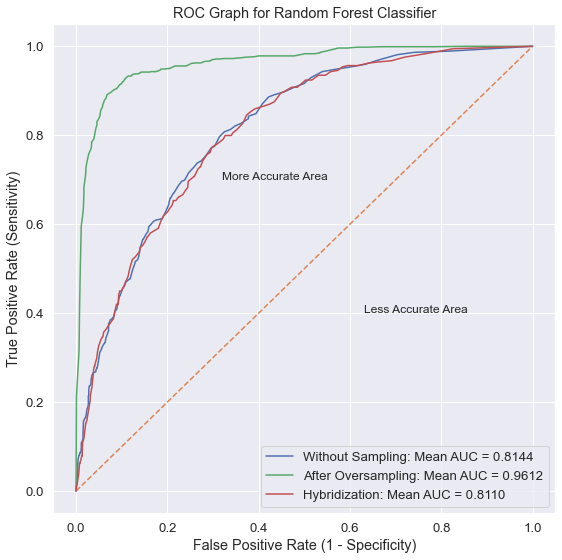

In [2963]:
# ROC curve of random forest classifier 
plt.figure(0).clf()
plt.figure(figsize=(9,9))

#Calculate probabilities of the classification using predict_proba of RFC
pred = rfc.fit(X_train, y_train).predict_proba(X_test)[:,1]

#calculate the True Positive Rate (tpr) and the False Positive Rate(fpr) 
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)

#Calculate the area under this curve 
auc = metrics.roc_auc_score(y_test, pred)
#Plot TPR on the y-axis and FPR on the x-axis
plt.plot(fpr,tpr,label='Without Sampling: Mean AUC = %0.4f' %(auc))
plt.plot([0, 1], ls="--")

#Calculate probabilities of the classification using predict_proba using oversampling

pred = rfc.fit(X_train_os, y_train_os).predict_proba(X_test_os)[:,1]

#calculate the True Positive Rate (tpr) and the False Positive Rate(fpr) 
fpr, tpr, thresh = metrics.roc_curve(y_test_os, pred)

#Calculate the area under this curve 
auc = metrics.roc_auc_score(y_test_os, pred)

#Plot TPR on the y-axis and FPR on the x-axis
plt.plot(fpr,tpr,label='After Oversampling: Mean AUC = %0.4f' %(auc))


#Calculate probabilities of the classification using predict_proba using Hybridization

pred = rfc.fit(X_train_smtom, y_train_smtom).predict_proba(X_test)[:,1]

#calculate the True Positive Rate (tpr) and the False Positive Rate(fpr) 
fpr, tpr, thresh = metrics.roc_curve(y_test, pred)

#Calculate the area under this curve 
auc = metrics.roc_auc_score(y_test, pred)

#Plot TPR on the y-axis and FPR on the x-axis
plt.plot(fpr,tpr,label='Hybridization: Mean AUC = %0.4f' %(auc))

plt.legend(loc=0)
plt.title('ROC Graph for Random Forest Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.text(0.32,0.7,'More Accurate Area',fontsize = 12)
plt.text(0.63,0.4,'Less Accurate Area',fontsize = 12)
plt.grid(True)

Oversampling lifted the AUC of the model.

Hybridization had little effect on the AUC of the model.



Comparing the metrics of the two techniques using the Random Foresr Classifier, the first technique "Resampling techniques — Oversampling" is better than the second technique of Hybridization.